In [2]:
import pandas as pd
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
# import data in the form of html
URL = "https://en.wikipedia.org/wiki/Logistic_regression"
table_class = "wikitable sortable jquery-tablesorter"
response = requests.get(URL)


In [14]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table= soup.find('table',{'class':"wikitable"})

In [16]:
#Read the table into a pandas dataframe
df = pd.read_html(str(table))
# convert list to dataframe
df = pd.DataFrame(df[0])
print(df.head())

           0    1     2    3     4    5     6     7    8     9   ...    11  \
0  Hours (xk)  0.5  0.75  1.0  1.25  1.5  1.75  1.75  2.0  2.25  ...  2.75   
1   Pass (yk)  0.0  0.00  0.0  0.00  0.0  0.00  1.00  0.0  1.00  ...  1.00   

    12    13   14   15    16   17    18   19   20  
0  3.0  3.25  3.5  4.0  4.25  4.5  4.75  5.0  5.5  
1  0.0  1.00  0.0  1.0  1.00  1.0  1.00  1.0  1.0  

[2 rows x 21 columns]


Text(0, 0.5, 'Pass')

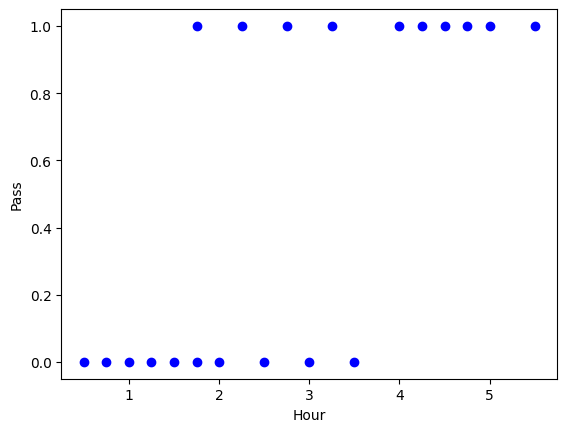

In [6]:
#Define the X and Y variables
Hour = df.iloc[0,1:len(df.columns)].values
Pass = df.iloc[1,1:len(df.columns)].values

#Plot the data
plt.plot(Hour,Pass,'bo')
plt.xlabel('Hour')
plt.ylabel('Pass')

In [19]:
#Transform the x-data into a integer array 
Pass = Pass.astype('int')
print(Pass)
#reshape the y-data to use in the logistic regression model 
Hour = Hour.reshape(-1,1)
print(Hour)

[0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]
[[0.5]
 [0.75]
 [1.0]
 [1.25]
 [1.5]
 [1.75]
 [1.75]
 [2.0]
 [2.25]
 [2.5]
 [2.75]
 [3.0]
 [3.25]
 [3.5]
 [4.0]
 [4.25]
 [4.5]
 [4.75]
 [5.0]
 [5.5]]


In [21]:
#Define the model and fit the data
regression = LogisticRegression()
regression.fit(Hour, Pass)

#Get the parameters of the model
beta_0 = regression.intercept_
beta_1 = regression.coef_

Text(0, 0.5, 'Pass')

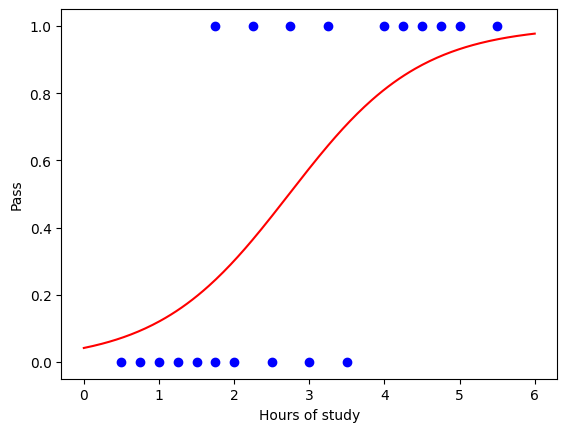

In [24]:

plt.plot(Hour, Pass, 'bo')
# Create a domain to plot the sigmoid function
x = np.linspace(0, 6, 250)

#Create function
def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

#Call function
r = sigmoid(x * beta_1 + beta_0).ravel()

#Plot the logistic regression function
plt.plot(x, r, color = 'red')
plt.xlabel('Hours of study')
plt.ylabel('Pass')